In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
order=pd.read_csv("data/Orders.csv", index_col="Row.ID")
print(order.shape)

(51290, 23)


In [110]:
order.head()

,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,...,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,year,month
Row.ID,,,,,,,,,,,,,,,,,,,,,
40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,...,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,2014,11
26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,...,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical,2014,2
25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,...,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium,2014,10
13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,...,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium,2014,1
47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,...,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical,2014,11


In [108]:
returns=pd.read_csv("data/Returns.csv")
print(returns.shape)

(1079, 3)


### Problem 1: Dataset Import & Cleaning

In [18]:
order["Profit"] = order["Profit"].str.replace('$','' ).str.replace(',','').astype(float)
order["Sales"] = order["Sales"].str.replace('$','' ).str.replace(',','').astype(float)

### Problem 2: Inventory Management

In [24]:
order['year'] = pd.DatetimeIndex(order['Order.Date']).year

In [27]:
order['month'] = pd.DatetimeIndex(order['Order.Date']).month

In [53]:
IM1 = order.groupby(["year",'month'])[["Quantity"]].agg("sum")
#IM1.groupby(['month'])[["Quantity"]].mean() ## mean by year

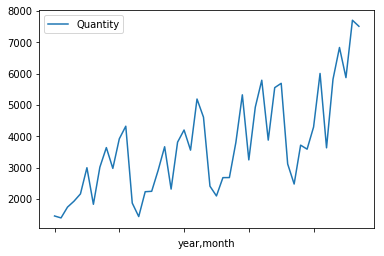

In [105]:
IM1.plot()

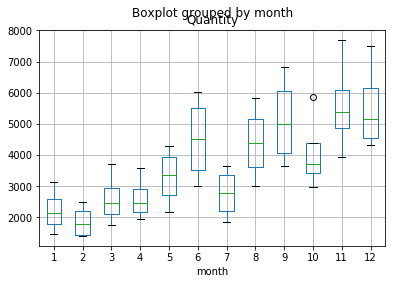

In [55]:
IM1.boxplot(by='month', column='Quantity')

In [ ]:
IM1.order.groupby(['month'])

In [106]:
IM2 = order.groupby(["year",'month',"Category"])["Category"].agg({'Count': 'count'})
IM2.head()

C:\Users\Soo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


Count
year month Category              
2012 1     Furniture           80
           Office Supplies    286
           Technology          67
     2     Furniture           81
           Office Supplies    250

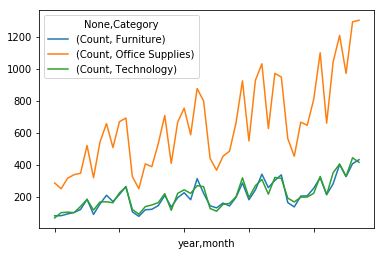

In [104]:
# use unstack()
IM2.unstack().plot()

### Problem 3: Why did customers make returns?

In [111]:
returns =returns.rename(columns = {"Order ID": "Order.ID"})

In [112]:
returns.head()

,Returned,Order.ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania


In [115]:
orders = pd.merge(order, returns, how='left', on ='Order.ID')
del(orders["Region_y"])

In [143]:
orders.loc[orders["Returned"]!="Yes", "Returned"]=0

In [144]:
orders.groupby(["Returned","year"])["Profit"].sum()

Returned  year
0         2012    231463.09
          2013    298145.44
          2014    389424.26
          2015    487053.13
Yes       2012     17477.26
          2013      9269.89
          2014     17510.63
          2015     17112.97
Name: Profit, dtype: float64

In [142]:
orders["Returned"]=="Yes"
orders.groupby(["Customer.ID"]).filter(lambda x: len(x) >= 5)

,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,...,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,year,month,Returned
1,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,...,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.630,Critical,2014,2,No
2,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,...,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.490,Medium,2014,10,No
3,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,...,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.160,Medium,2014,1,No
5,IN-2014-JM156557-41818,6/28/14,7/1/14,Second Class,JM-156557,Jim Mitchum,Corporate,NaN,Sydney,New South Wales,...,"Samsung Smart Phone, with Caller ID",2862.68,5,0.1,763.28,897.350,Critical,2014,6,No
6,IN-2012-TS2134092-41219,11/6/12,11/8/12,First Class,TS-2134092,Toby Swindell,Consumer,NaN,Porirua,Wellington,...,"Novimex Executive Leather Armchair, Adjustable",1822.08,4,0.0,564.84,894.770,Critical,2012,11,No
12,SA-2012-MM7260110-41269,12/26/12,12/28/12,Second Class,MM-7260110,Magdelene Morse,Consumer,NaN,Jizan,Jizan,...,"Cisco Smart Phone, with Caller ID",2616.96,4,0.0,1151.40,832.410,Critical,2012,12,No
15,ES-2015-BP1118545-42216,7/31/15,8/3/15,Second Class,BP-1118545,Ben Peterman,Corporate,NaN,Paris,Ile-de-France,...,"Breville Refrigerator, Red",1869.59,4,0.1,186.95,801.660,Critical,2015,7,No
22,IN-2012-JK1532527-41030,5/1/12,5/2/12,First Class,JK-1532527,Jason Klamczynski,Corporate,NaN,Suzhou,Anhui,...,"SAFCO Executive Leather Armchair, Black",2754.00,6,0.0,358.02,752.470,Critical,2012,5,No
23,ES-2014-LB16795139-41697,2/27/14,3/1/14,Second Class,LB-16795139,Laurel Beltran,Home Office,NaN,Edinburgh,Scotland,...,"KitchenAid Refrigerator, Black",5273.70,10,0.0,1898.40,730.910,High,2014,2,No
26,IN-2012-PB19210127-41259,12/16/12,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,Taipei City,...,"Lesro Conference Table, with Bottom Storage",1715.16,2,0.0,720.36,725.570,Critical,2012,12,Yes
